# Step 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Sets pandas to display all columns without truncation
pd.set_option("display.max_columns", None)

colors = ["#2c3e50", "#34495e", "#7f8c8d", "#e74c3c", "#c0392b"]
ordered_colors = [colors[0], colors[3], colors[2], colors[1], colors[4]]

In [2]:
df = pd.read_csv("data/train.csv")

In [3]:
print(df.shape)
print(df.columns.tolist())
df.head()

(15000, 14)
['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15709511.0,Ch'ang,754.0,Spain,Male,40.0,8.0,102954.68,2.0,1.0,1.0,149238.35,0.0
1,1,15592761.0,Genovese,579.0,France,Female,28.0,1.0,0.00,2.0,1.0,0.0,64869.32,0.0
2,2,15579914.0,Yeh,744.0,France,Female,56.0,5.0,0.00,1.0,1.0,0.0,158816.03,1.0
3,3,15669611.0,Nwachinemelu,697.0,France,Male,29.0,2.0,0.00,2.0,1.0,0.0,55775.72,0.0
4,4,15761775.0,Hs?eh,628.0,France,Female,22.0,9.0,0.00,2.0,1.0,0.0,49653.39,0.0


In [4]:
df = df.drop(columns=["id", "CustomerId", "Surname"])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      15000 non-null  float64
 1   Geography        15000 non-null  object 
 2   Gender           15000 non-null  object 
 3   Age              15000 non-null  float64
 4   Tenure           15000 non-null  float64
 5   Balance          15000 non-null  float64
 6   NumOfProducts    15000 non-null  float64
 7   HasCrCard        15000 non-null  float64
 8   IsActiveMember   15000 non-null  float64
 9   EstimatedSalary  15000 non-null  float64
 10  Exited           15000 non-null  float64
dtypes: float64(9), object(2)
memory usage: 1.3+ MB


In [6]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,15000.0,658.851467,72.587026,431.00,602.0,662.00,709.0000,850.00
Age,15000.0,37.888000,8.257409,18.00,32.0,37.00,42.0000,74.00
Tenure,15000.0,5.033333,2.808359,0.00,3.0,5.00,7.0000,10.00
Balance,15000.0,43124.060479,59777.868496,0.00,0.0,0.00,109650.9825,187530.66
NumOfProducts,15000.0,1.590733,0.535587,1.00,1.0,2.00,2.0000,4.00
HasCrCard,15000.0,0.783200,0.412079,0.00,1.0,1.00,1.0000,1.00
IsActiveMember,15000.0,0.500200,0.500017,0.00,0.0,1.00,1.0000,1.00
EstimatedSalary,15000.0,118134.828757,46803.114217,11.58,83629.6,123587.83,157558.4600,1557802.42
Exited,15000.0,0.203867,0.402884,0.00,0.0,0.00,0.0000,1.00


# Step 2

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

## 2.1. check for imbalance

In [10]:
df["Exited"].value_counts(normalize=True)

Exited
0.0    0.796133
1.0    0.203867
Name: proportion, dtype: float64

## 2.2 numeric variables

In [11]:
import scipy.stats as stats

In [12]:
numeric = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]

In [13]:
def plot_distributions(data, ordered_colors):

    numeric_columns = data.columns

    extended_colors = (ordered_colors * (len(numeric_columns) // len(ordered_colors) + 1))[:len(numeric_columns)]

    plt.style.use('seaborn-v0_8-whitegrid')
    sns.set_context("notebook", font_scale=1.2)

    for i, col in enumerate(numeric_columns):

        fig, axes = plt.subplots(1, 3, figsize=(18, 5), gridspec_kw={'width_ratios': [2, 1, 2]})
        fig.suptitle(f'Univariate Analysis of {col}', fontsize=16, weight='bold', y=1.05)

        sns.histplot(data[col], kde=True, color=extended_colors[i], ax=axes[0], bins=30)
        axes[0].set_title(f'{col} Histogram', fontsize=14)
        axes[0].set_xlabel(col, fontsize=12)
        axes[0].set_ylabel('Frequency', fontsize=12)

        mean_val = data[col].mean()
        median_val = data[col].median()
        axes[0].axvline(mean_val, color='green', linestyle='--', label=f'Mean: {mean_val:.2f}')
        axes[0].axvline(median_val, color='purple', linestyle='-', label=f'Median: {median_val:.2f}')
        axes[0].legend(fontsize=10)

        sns.boxplot(y=data[col], ax=axes[1], color=extended_colors[i], flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
        axes[1].set_title(f'{col} Box Plot', fontsize=14)
        axes[1].set_ylabel(col, fontsize=12)


        stats.probplot(data[col], dist="norm", plot=axes[2] , rvalue=True)
        axes[2].set_title(f'{col} Q-Q Plot', fontsize=14)
        axes[2].set_xlabel('Theoretical Quantiles', fontsize=12)
        axes[2].set_ylabel('Sample Quantiles', fontsize=12)

        skewness = stats.skew(data[col])
        kurtosis = stats.kurtosis(data[col])

        stats_text = f'{col} Skewness: {skewness:.2f}\n{col} Kurtosis: {kurtosis:.2f}'
        fig.text(0.01, 0.95, stats_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

        plt.tight_layout()
        plt.show()

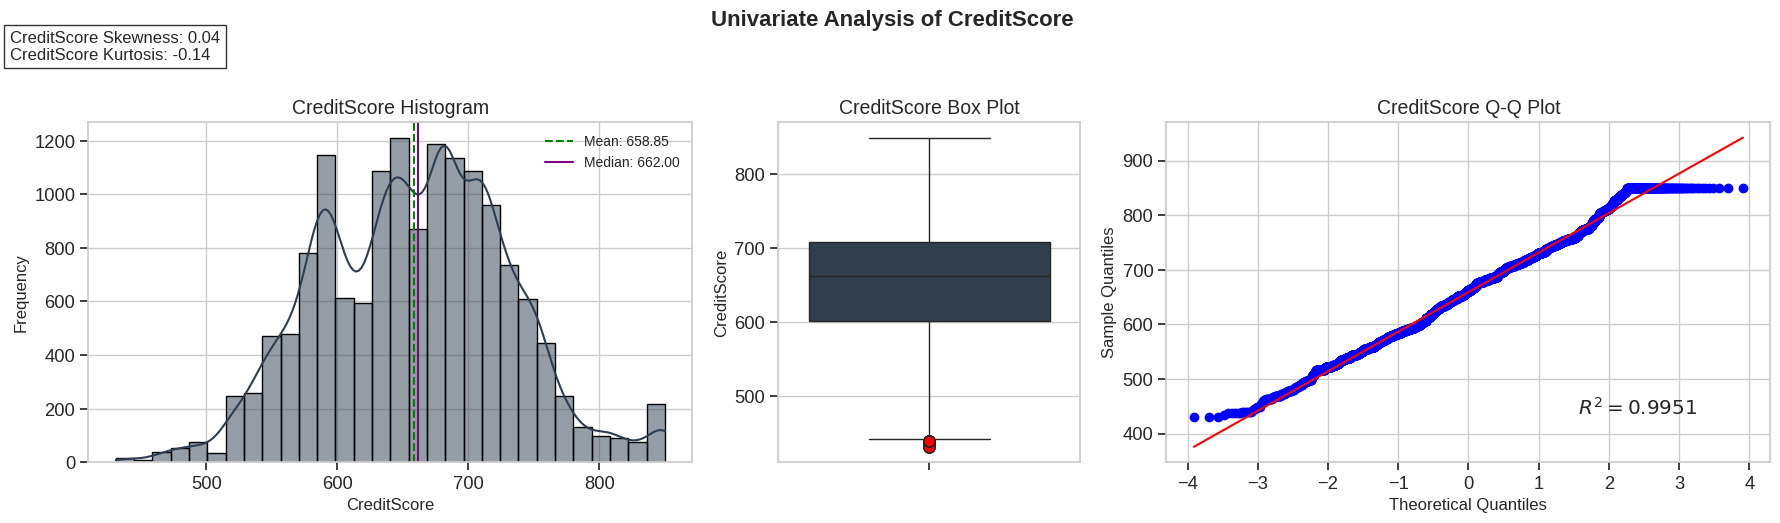

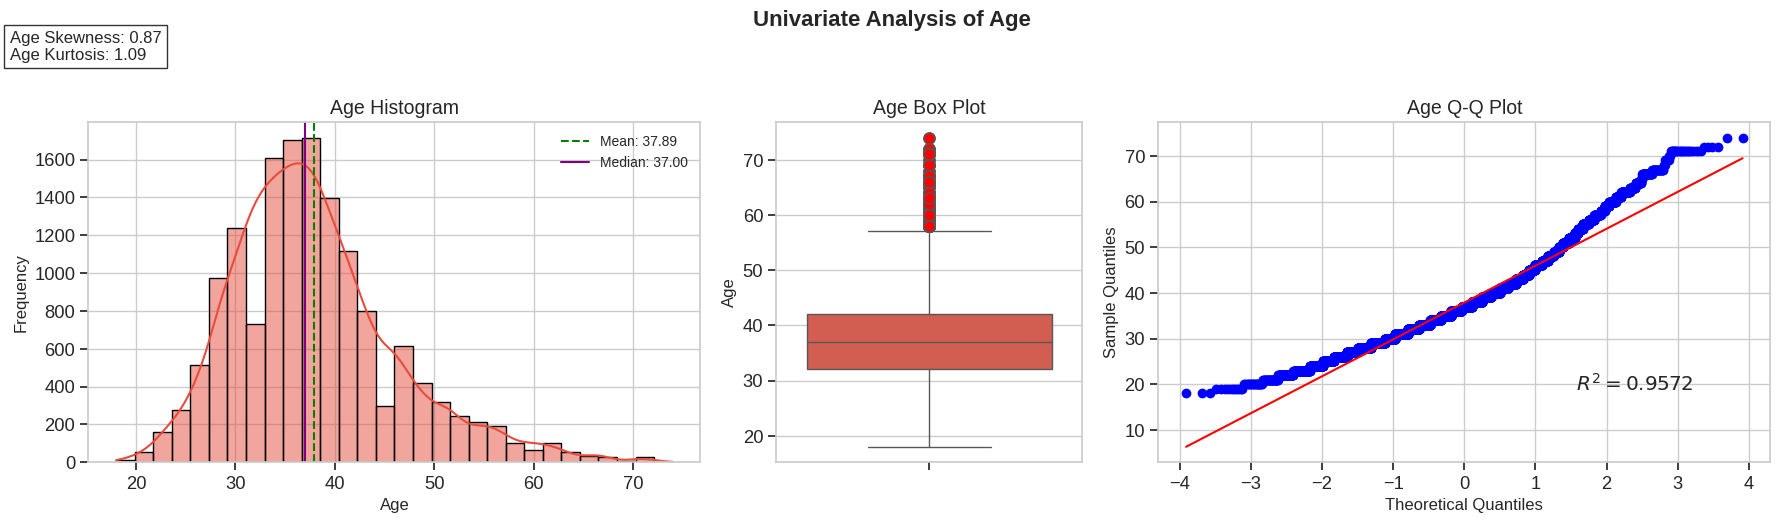

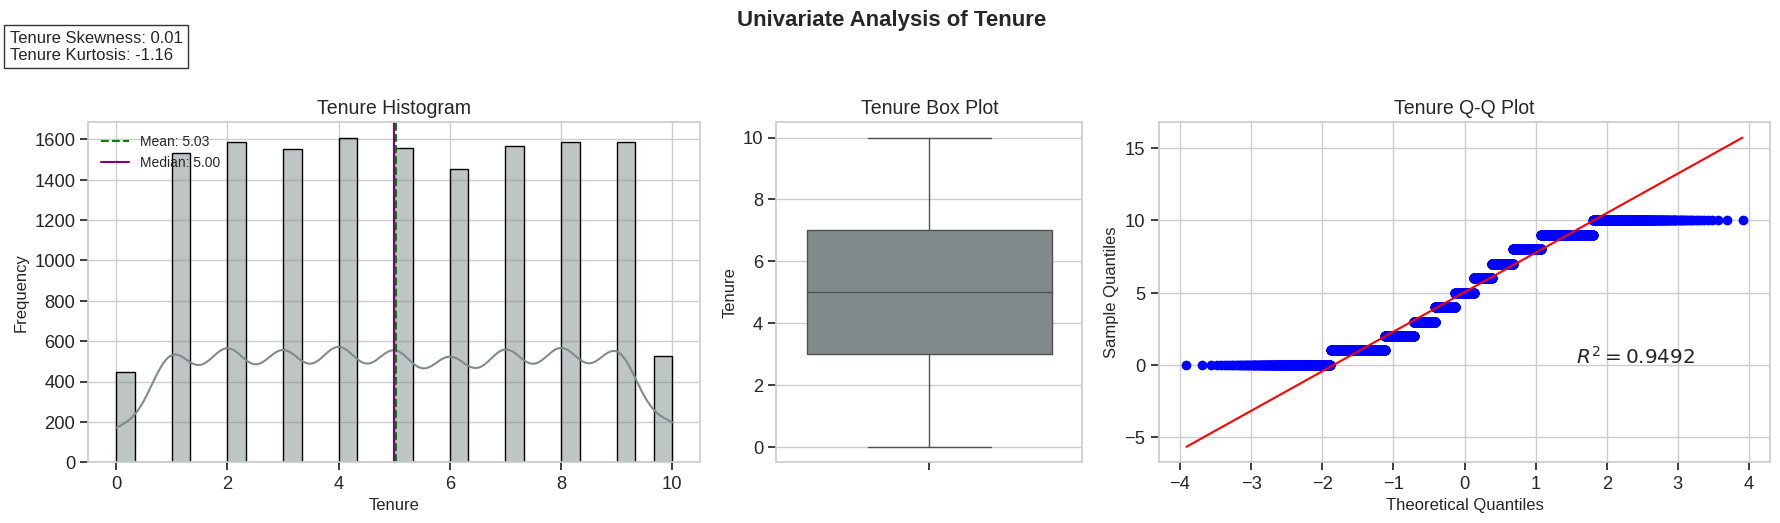

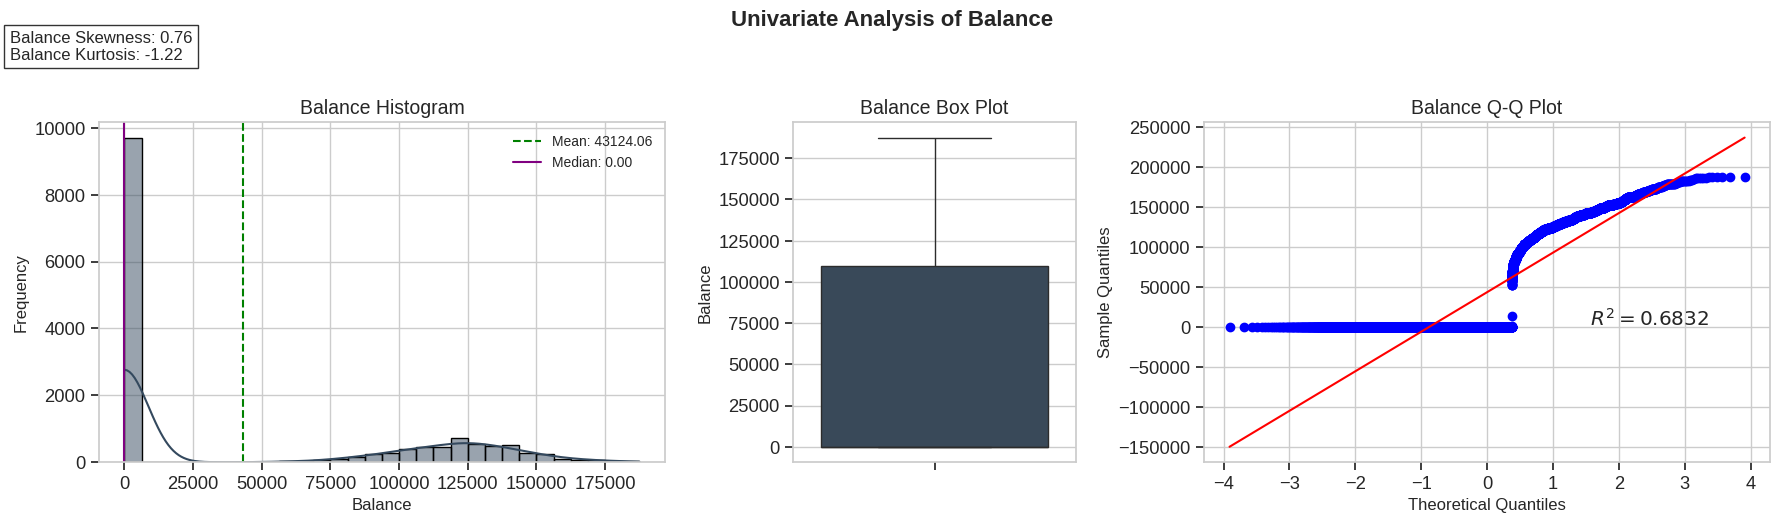

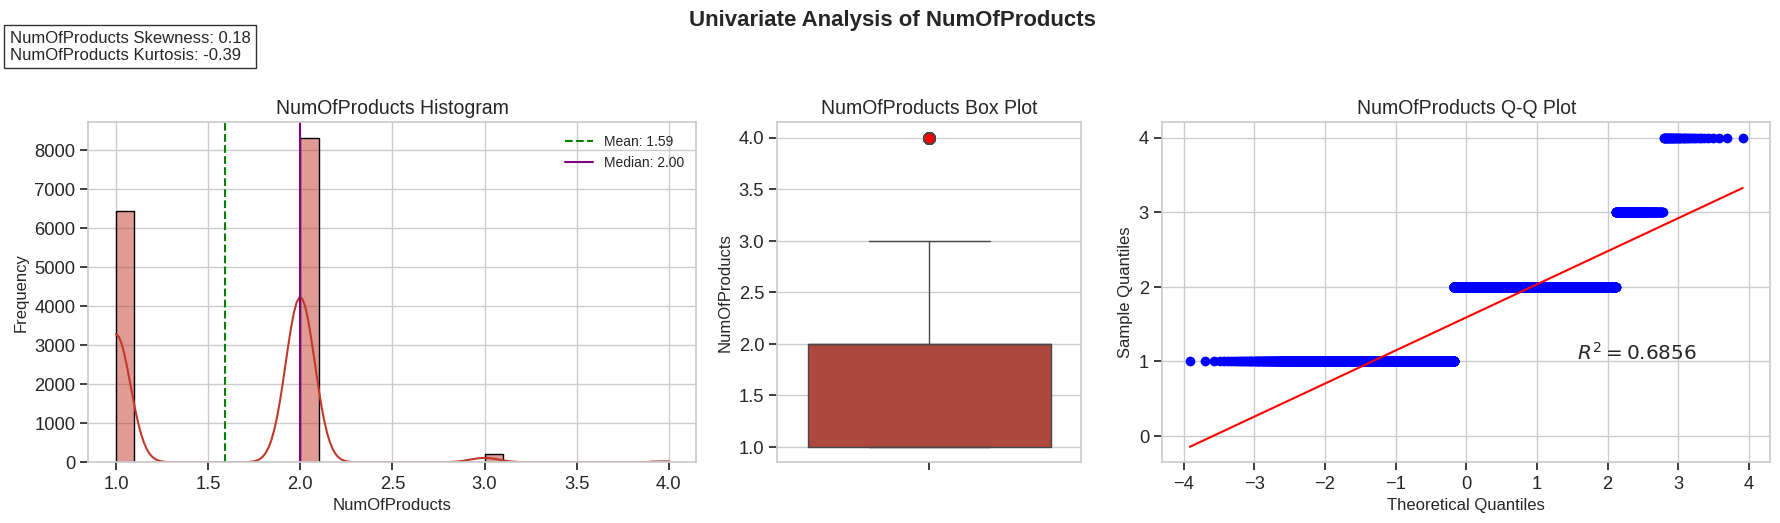

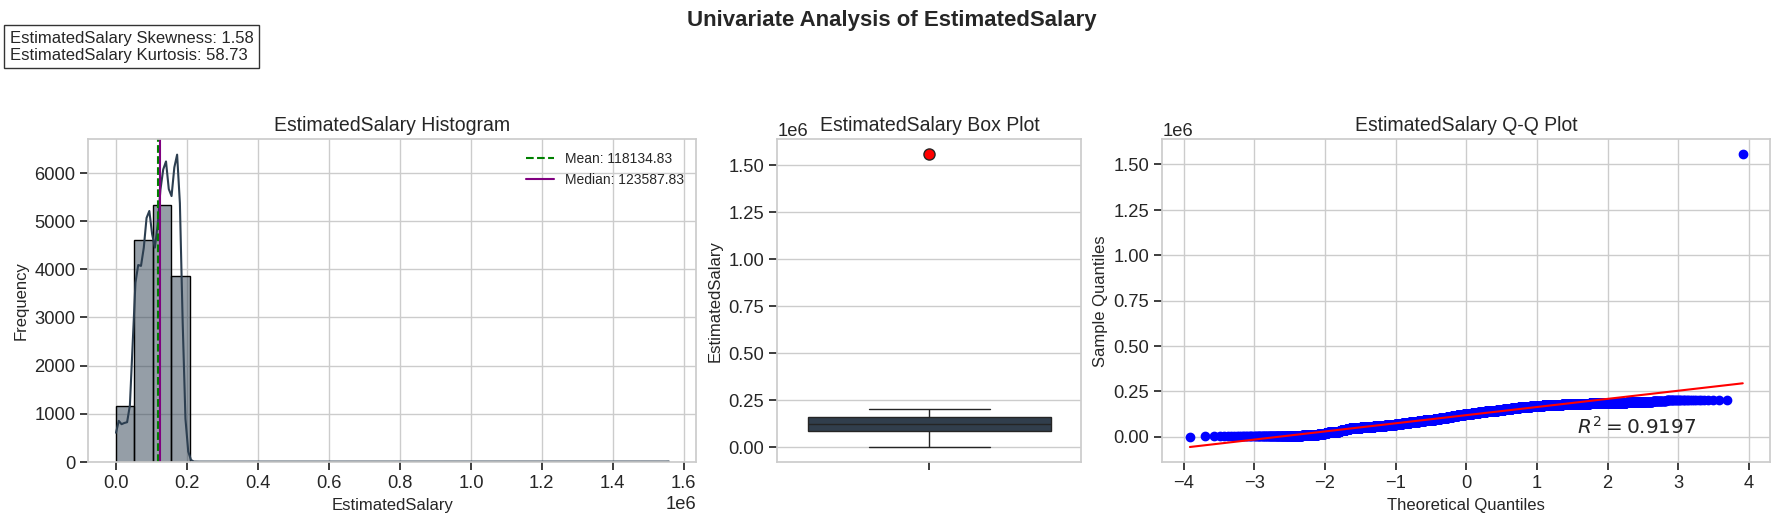

In [14]:
plot_distributions(df[numeric], ordered_colors)

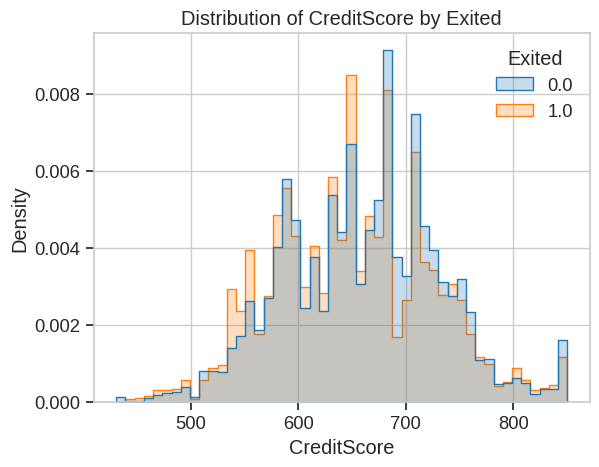

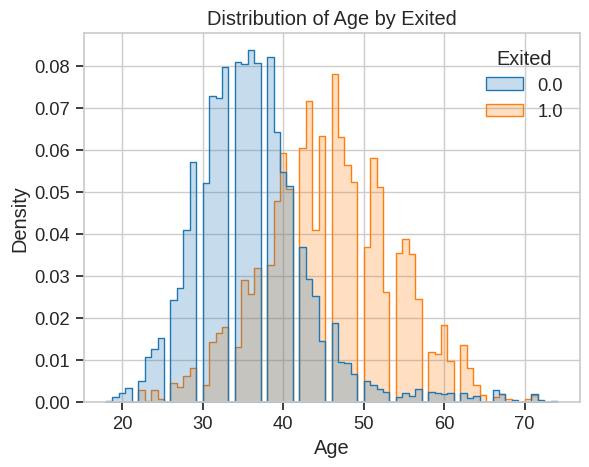

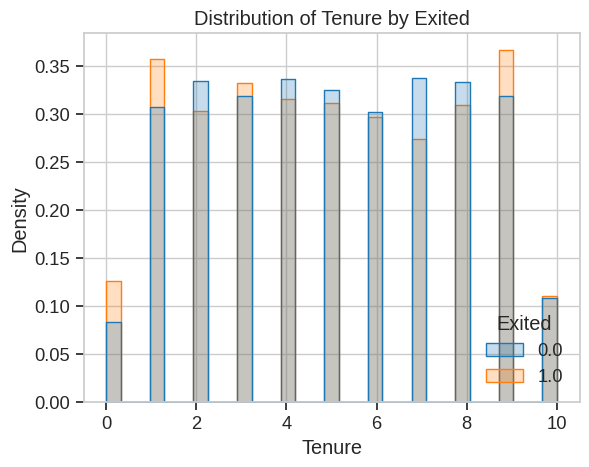

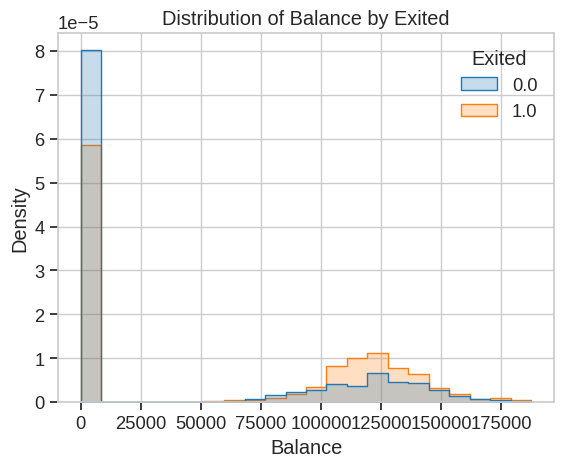

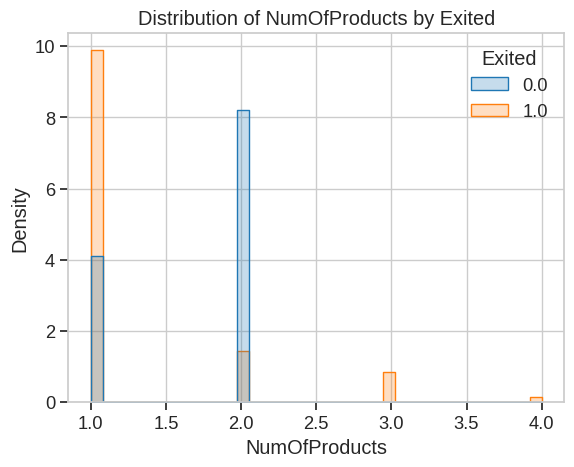

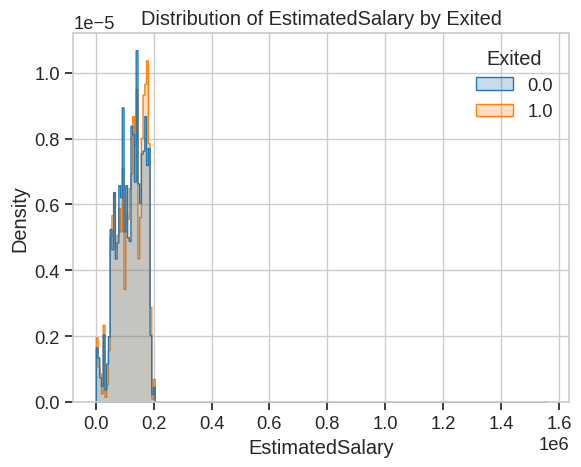

In [15]:
# num var vs exited
for col in numeric:
    plt.figure()
    sns.histplot(data=df, x=col, hue="Exited", stat="density", common_norm=False, element="step")
    plt.title(f"Distribution of {col} by Exited")
    plt.show()

## 2.3 categorical variables

In [16]:
categorical = ["Geography", "Gender"]

In [17]:
from tabulate import tabulate

In [18]:
def plot_categorical_features(data):

    categorical_cols = data.columns.to_list()

    plt.style.use('seaborn-v0_8')
    custom_palette = ['#3498db', '#e74c3c', '#2ecc71', '#f1c40f', '#9b59b6']  # New custom palette: blue, red, green, yellow, purple
    sns.set_palette(custom_palette)

    for col in categorical_cols:
        labels = data[col].value_counts().keys()
        counts = data[col].value_counts().values
        percentages = [f'{count} ({(count / len(data) * 100):.1f}%)' for count in counts]

        plt.figure(figsize=(6, 4))
        plt.pie(counts, labels=percentages, shadow=True,
                explode=[0.1 if i == 0 else 0 for i in range(len(labels))],
                startangle=90, textprops={'fontsize': 12, 'weight': 'bold'})

        plt.title(f'Distribution of {col}', fontsize=14, pad=20)
        plt.axis('equal')
        plt.tight_layout()
        plt.show()

        value_counts = data[col].value_counts()
        relative_freq = (data[col].value_counts(normalize=True) * 100).round(1)
        table_data = pd.DataFrame({
            'Value': value_counts.index,
            'Count': value_counts.values,
            'Relative Frequency (%)': relative_freq.values
        })
        print(tabulate(table_data, headers='keys', tablefmt='psql', showindex=False))
        print("\n")

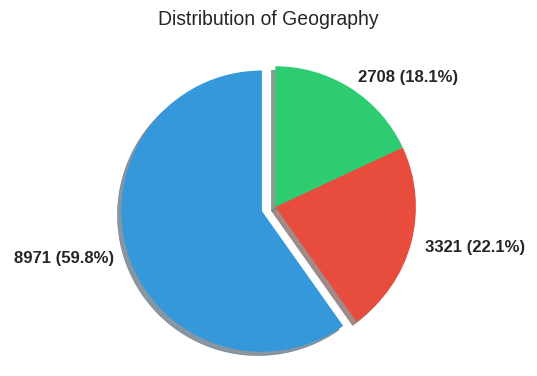

+---------+---------+--------------------------+
| Value   |   Count |   Relative Frequency (%) |
|---------+---------+--------------------------|
| France  |    8971 |                     59.8 |
| Spain   |    3321 |                     22.1 |
| Germany |    2708 |                     18.1 |
+---------+---------+--------------------------+




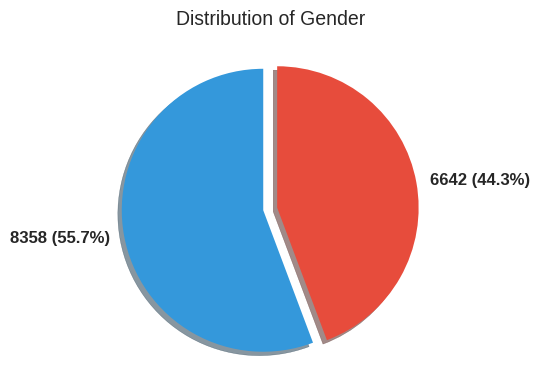

+---------+---------+--------------------------+
| Value   |   Count |   Relative Frequency (%) |
|---------+---------+--------------------------|
| Male    |    8358 |                     55.7 |
| Female  |    6642 |                     44.3 |
+---------+---------+--------------------------+




In [19]:
plot_categorical_features(df[categorical])

,count,churn_rate
Geography,,
Germany,2708,0.419867
Spain,3321,0.158988
France,8971,0.155278


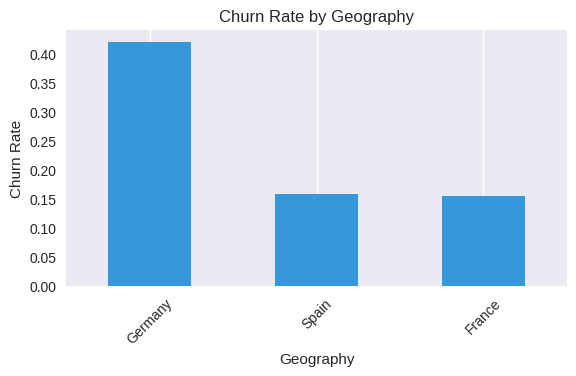

,count,churn_rate
Gender,,
Female,6642,0.283047
Male,8358,0.140943


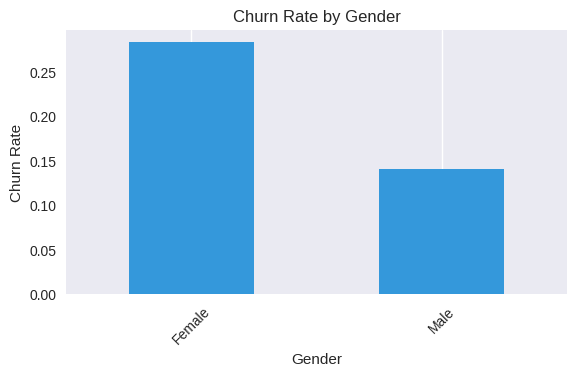

In [20]:
# cat var vs exited
for col in categorical:
    grp = df.groupby(col)["Exited"].agg(["count", "mean"]).rename(columns={"mean": "churn_rate"})
    display(grp.sort_values("churn_rate", ascending=False))
    
    # plot churn rate bar chart
    plt.figure(figsize=(6, 4))
    grp["churn_rate"].sort_values(ascending=False).plot(kind="bar")
    plt.title(f"Churn Rate by {col}")
    plt.ylabel("Churn Rate")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.grid(axis="y")
    plt.tight_layout()
    plt.show()

## 2.4 check for high correlation & multicollinearity

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [22]:
all_corr_cols = numeric + ["Exited"]

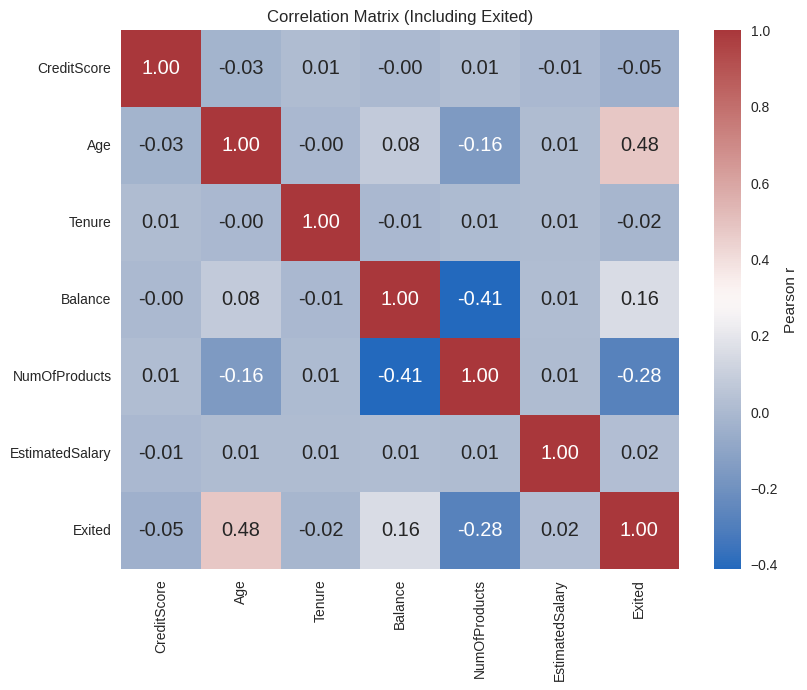

In [23]:
# check for high corr & multicollinearity
corr_matrix = df[all_corr_cols].corr()

plt.figure(figsize=(9, 7))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="vlag",
    cbar_kws={"label": "Pearson r"}
)
plt.title("Correlation Matrix (Including Exited)")
plt.show()

In [24]:
X_numeric = df[numeric].copy()
vif_df = pd.DataFrame({
    "feature": X_numeric.columns,
    "VIF": [
        variance_inflation_factor(X_numeric.values, i) 
        for i in range(X_numeric.shape[1])
    ]
})

print("Variance Inflation Factors (VIF) for Numeric Features:")
vif_df.sort_values("VIF", ascending=False)

Variance Inflation Factors (VIF) for Numeric Features:


,feature,VIF
0,CreditScore,30.854317
1,Age,17.837811
4,NumOfProducts,10.530242
5,EstimatedSalary,7.044724
2,Tenure,4.123588
3,Balance,1.778347


Why Multicollinearity Matters

Logistic Regression (or any linear‐based model) can suffer from:
- Unstable coefficients: small changes in the data can cause large swings in β‐values for collinear predictors.
- Difficulty interpreting coefficients: when CreditScore and Age move together, it’s hard to disentangle their individual “effect” on churn.
- Inflated standard errors: statistical tests of significance become unreliable.

Tree‐Based Models (e.g. Random Forest, XGBoost)
- Are less sensitive to multicollinearity, since splits can freely choose one variable or the other.
- However, if two features carry nearly identical information, the tree’s importance scores get “split” between them—so neither may appear top‐ranked, even though that combined signal could be strong.

# Step 4

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, classification_report
)

In [26]:
Y = df["Exited"]
X_raw = df.drop(columns=["Exited"])

In [27]:
X_raw.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,754.0,Spain,Male,40.0,8.0,102954.68,2.0,1.0,1.0,149238.35
1,579.0,France,Female,28.0,1.0,0.00,2.0,1.0,0.0,64869.32
2,744.0,France,Female,56.0,5.0,0.00,1.0,1.0,0.0,158816.03
3,697.0,France,Male,29.0,2.0,0.00,2.0,1.0,0.0,55775.72
4,628.0,France,Female,22.0,9.0,0.00,2.0,1.0,0.0,49653.39


In [28]:
cat_cols = X_raw.select_dtypes(include=["object", "category"]).columns.tolist()
cat_cols += ['HasCrCard', 'IsActiveMember']
print("Categorical columns:", cat_cols)

Categorical columns: ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']


In [29]:
# A) Full one‐hot encoding for tree models (keep all levels)
X_ohe_full = pd.get_dummies(
    X_raw,
    columns=cat_cols,
    drop_first=False
)

# B) Reduced one‐hot encoding for linear models (drop first level)
X_ohe_drop = pd.get_dummies(
    X_raw,
    columns=cat_cols,
    drop_first=True
)

# C) Label encoding for tree models (compact integer codes)
ord_enc = OrdinalEncoder()
X_label = X_raw.copy()
X_label[cat_cols] = ord_enc.fit_transform(X_raw[cat_cols])

# D) Stratified K-Fold(leak-safe) target encoding for all categorical features
X_target = X_raw.copy()

# Create empty columns for target‐encoded values
for col in cat_cols:
    X_target[f"{col}_target_enc"] = np.nan

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=10000)
global_mean = Y.mean()

for col in cat_cols:
    for train_idx, val_idx in skf.split(X_raw, Y):
        # Compute category means on the "train" portion
        means = (
            Y.iloc[train_idx]
             .groupby(X_raw[col].iloc[train_idx])
             .mean()
        )
        # Map those means onto the "validation" portion
        X_target.loc[
            X_raw.index[val_idx],
            f"{col}_target_enc"
        ] = X_raw.loc[X_raw.index[val_idx], col].map(means)
    # Fill NaNs (unseen categories) with global mean
    X_target[f"{col}_target_enc"] = X_target[f"{col}_target_enc"].fillna(global_mean)

# Drop original categorical columns, keep only target‐encoded versions
X_target.drop(columns=cat_cols, inplace=True)

# Inspect shapes
print("X_ohe_full shape:", X_ohe_full.shape)
print("X_ohe_drop shape:", X_ohe_drop.shape)
print("X_label    shape:", X_label.shape)
print("X_target   shape:", X_target.shape)

X_ohe_full shape: (15000, 15)
X_ohe_drop shape: (15000, 11)
X_label    shape: (15000, 10)
X_target   shape: (15000, 10)


# Step 5

In [55]:
import pandas as pd
import numpy as np

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score

In [56]:
rf_params = {
    'n_estimators': 200,
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 5,
    'min_samples_split': 5,
    'bootstrap': True,
    'class_weight': 'balanced',
    'random_state': 42,
    'n_jobs': -1
}

metrics = {
    'encoding': [],
    'fold': [],
    'precision': [],
    'recall': [],
    'f1': [],
    'auc': []
}

In [57]:
# Stratified 5-fold on indices (same splits for each encoding)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold_idx, (train_idx, valid_idx) in enumerate(outer_cv.split(X_ohe_full, Y), start=1):
    # Split each encoded matrix into train/valid for this fold
    Xo_train, Xo_val = X_ohe_full.iloc[train_idx], X_ohe_full.iloc[valid_idx]
    Xl_train, Xl_val = X_label.iloc[train_idx], X_label.iloc[valid_idx]
    Xt_train, Xt_val = X_target.iloc[train_idx], X_target.iloc[valid_idx]
    y_tr, y_val_fold = Y.iloc[train_idx], Y.iloc[valid_idx]

    datasets = [
        ('one-hot', Xo_train, Xo_val),
        ('label',   Xl_train, Xl_val),
        ('target',  Xt_train, Xt_val)
    ]

    for encoding_name, Xtr, Xvl in datasets:
        # Fit RF on this fold
        rf = RandomForestClassifier(**rf_params)
        rf.fit(Xtr, y_tr)

        # Predict on validation fold
        pred  = rf.predict(Xvl)
        proba = rf.predict_proba(Xvl)[:, 1]

        # Compute metrics
        prec = precision_score(y_val_fold, pred)
        rec  = recall_score(y_val_fold, pred)
        f1   = f1_score(y_val_fold, pred)
        auc  = roc_auc_score(y_val_fold, proba)

        # Record metrics
        metrics['encoding'].append(encoding_name)
        metrics['fold'].append(fold_idx)
        metrics['precision'].append(prec)
        metrics['recall'].append(rec)
        metrics['f1'].append(f1)
        metrics['auc'].append(auc)

In [58]:
# Convert metrics to a DataFrame
results = pd.DataFrame(metrics)

# Compute mean and std for each encoding
summary = results.groupby('encoding').agg({
    'precision': ['mean', 'std'],
    'recall':    ['mean', 'std'],
    'f1':        ['mean', 'std'],
    'auc':       ['mean', 'std']
}).reset_index()

# Flatten multiindex columns
summary.columns = [
    'encoding',
    'precision_mean', 'precision_std',
    'recall_mean',    'recall_std',
    'f1_mean',        'f1_std',
    'auc_mean',       'auc_std'
]

  encoding  precision_mean  precision_std  recall_mean  recall_std   f1_mean  \
0    label        0.692377       0.012791     0.784174    0.019595  0.735318   
1  one-hot        0.678935       0.013437     0.782543    0.024339  0.726840   
2   target        0.703040       0.020001     0.775022    0.023144  0.737048   

     f1_std  auc_mean   auc_std  
0  0.012562  0.930523  0.006859  
1  0.011897  0.928782  0.007838  
2  0.015618  0.929702  0.007796  


In [59]:
summary

,encoding,precision_mean,precision_std,recall_mean,recall_std,f1_mean,f1_std,auc_mean,auc_std
0,label,0.692377,0.012791,0.784174,0.019595,0.735318,0.012562,0.930523,0.006859
1,one-hot,0.678935,0.013437,0.782543,0.024339,0.726840,0.011897,0.928782,0.007838
2,target,0.703040,0.020001,0.775022,0.023144,0.737048,0.015618,0.929702,0.007796


In [63]:
from sklearn.linear_model import LogisticRegression

lr_params = {
    'C': 1.0,
    'penalty': 'l2',
    'solver': 'liblinear',
    'class_weight': 'balanced',
    'random_state': 42,
    'max_iter': 1000
}

# Initialize containers for storing per‐fold metrics, now including precision and recall
metrics_lr = {
    'encoding': [],
    'fold': [],
    'precision': [],
    'recall': [],
    'f1': [],
    'auc': []
}

# Reuse the same outer_cv (StratifiedKFold) from before
for fold_idx, (train_idx, valid_idx) in enumerate(outer_cv.split(X_ohe_drop, Y), start=1):
    Xd_tr, Xd_val = X_ohe_drop.iloc[train_idx], X_ohe_drop.iloc[valid_idx]
    y_tr, y_val_fold = Y.iloc[train_idx], Y.iloc[valid_idx]

    # Fit and evaluate LR on reduced one-hot
    lr = LogisticRegression(**lr_params)
    lr.fit(Xd_tr, y_tr)
    pred_lr  = lr.predict(Xd_val)
    proba_lr = lr.predict_proba(Xd_val)[:, 1]

    precision_lr = precision_score(y_val_fold, pred_lr)
    recall_lr    = recall_score(y_val_fold, pred_lr)
    f1_lr        = f1_score(y_val_fold, pred_lr)
    auc_lr       = roc_auc_score(y_val_fold, proba_lr)

    metrics_lr['encoding'].append('LR (one-hot drop)')
    metrics_lr['fold'].append(fold_idx)
    metrics_lr['precision'].append(precision_lr)
    metrics_lr['recall'].append(recall_lr)
    metrics_lr['f1'].append(f1_lr)
    metrics_lr['auc'].append(auc_lr)


In [64]:
df_lr = pd.DataFrame(metrics_lr)

# Compute mean and std for precision, recall, f1, and auc
summary_lr = df_lr.groupby('encoding').agg({
    'precision': ['mean', 'std'],
    'recall':    ['mean', 'std'],
    'f1':        ['mean', 'std'],
    'auc':       ['mean', 'std']
}).reset_index()

# Flatten multiindex columns
summary_lr.columns = [
    'encoding',
    'precision_mean', 'precision_std',
    'recall_mean',    'recall_std',
    'f1_mean',        'f1_std',
    'auc_mean',       'auc_std'
]

In [65]:
summary_lr

,encoding,precision_mean,precision_std,recall_mean,recall_std,f1_mean,f1_std,auc_mean,auc_std
0,LR (one-hot drop),0.511446,0.030275,0.791708,0.023102,0.620777,0.021731,0.868751,0.013436


Among these:
- Target encoding edges out the others on mean F1 (0.737 vs. 0.735 for label and 0.727 for one-hot), although its standard deviation is slightly larger.
- Label encoding is almost as good (F1=0.735±0.013, AUC=0.930±0.0069) and is quite stable.
- One-hot was marginally behind (F1=0.727, AUC=0.929).

# Step 6

In [66]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

import lightgbm as lgb
import xgboost as xgb

In [67]:
# 2A) Fixed hyperparameters for each model (you can tune them later)
rf_params = {
    'n_estimators': 200,
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 5,
    'min_samples_split': 5,
    'bootstrap': True,
    'class_weight': 'balanced',
    'random_state': 42,
    'n_jobs': -1
}

lgb_params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'n_estimators': 200,
    'learning_rate': 0.05,
    'num_leaves': 31,
    'class_weight': 'balanced',
    'random_state': 42,
    'n_jobs': -1
}

xgb_params = {
    'objective': 'binary:logistic',
    'n_estimators': 200,
    'learning_rate': 0.05,
    'max_depth': 6,
    'scale_pos_weight': (1.0 / (Y.mean())),  # approximate weighting
    'random_state': 42,
    'n_jobs': -1,
    'use_label_encoder': False,
    'eval_metric': 'logloss'
}

# 2B) Prepare containers for per-fold metrics
metrics = {
    'model': [],
    'fold': [],
    'precision': [],
    'recall': [],
    'f1': [],
    'auc': []
}

# 2C) Stratified 5-fold splitter
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold_idx, (train_idx, valid_idx) in enumerate(outer_cv.split(X_label, Y), start=1):
    Xtr, Xvl = X_label.iloc[train_idx], X_label.iloc[valid_idx]
    ytr, yvl = Y.iloc[train_idx], Y.iloc[valid_idx]

    # --- Random Forest ---
    rf = RandomForestClassifier(**rf_params)
    rf.fit(Xtr, ytr)
    pred_rf  = rf.predict(Xvl)
    proba_rf = rf.predict_proba(Xvl)[:, 1]
    prec_rf = precision_score(yvl, pred_rf)
    rec_rf  = recall_score(yvl, pred_rf)
    f1_rf   = f1_score(yvl, pred_rf)
    auc_rf  = roc_auc_score(yvl, proba_rf)

    metrics['model'].append('RF')
    metrics['fold'].append(fold_idx)
    metrics['precision'].append(prec_rf)
    metrics['recall'].append(rec_rf)
    metrics['f1'].append(f1_rf)
    metrics['auc'].append(auc_rf)

    # --- LightGBM ---
    lgbm = lgb.LGBMClassifier(**lgb_params)
    lgbm.fit(Xtr, ytr)
    pred_lgb  = lgbm.predict(Xvl)
    proba_lgb = lgbm.predict_proba(Xvl)[:, 1]
    prec_lgb = precision_score(yvl, pred_lgb)
    rec_lgb  = recall_score(yvl, pred_lgb)
    f1_lgb   = f1_score(yvl, pred_lgb)
    auc_lgb  = roc_auc_score(yvl, proba_lgb)

    metrics['model'].append('LightGBM')
    metrics['fold'].append(fold_idx)
    metrics['precision'].append(prec_lgb)
    metrics['recall'].append(rec_lgb)
    metrics['f1'].append(f1_lgb)
    metrics['auc'].append(auc_lgb)

    # --- XGBoost ---
    xgbm = xgb.XGBClassifier(**xgb_params)
    xgbm.fit(Xtr, ytr, eval_set=[(Xvl, yvl)], verbose=False)
    pred_xgb  = xgbm.predict(Xvl)
    proba_xgb = xgbm.predict_proba(Xvl)[:, 1]
    prec_xgb = precision_score(yvl, pred_xgb)
    rec_xgb  = recall_score(yvl, pred_xgb)
    f1_xgb   = f1_score(yvl, pred_xgb)
    auc_xgb  = roc_auc_score(yvl, proba_xgb)

    metrics['model'].append('XGBoost')
    metrics['fold'].append(fold_idx)
    metrics['precision'].append(prec_xgb)
    metrics['recall'].append(rec_xgb)
    metrics['f1'].append(f1_xgb)
    metrics['auc'].append(auc_xgb)

# 2D) Convert metrics to DataFrame and summarize
results = pd.DataFrame(metrics)
summary = results.groupby('model').agg({
    'precision': ['mean', 'std'],
    'recall':    ['mean', 'std'],
    'f1':        ['mean', 'std'],
    'auc':       ['mean', 'std']
}).reset_index()

# Flatten column names
summary.columns = [
    'model',
    'precision_mean', 'precision_std',
    'recall_mean',    'recall_std',
    'f1_mean',        'f1_std',
    'auc_mean',       'auc_std'
]

[LightGBM] [Info] Number of positive: 2447, number of negative: 9553
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 834
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/home/gwei4/miniconda3/envs/kaggle_env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [18:57:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 2447, number of negative: 9553
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 838
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/home/gwei4/miniconda3/envs/kaggle_env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [18:57:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 2446, number of negative: 9554
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 838
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/home/gwei4/miniconda3/envs/kaggle_env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [18:57:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 2446, number of negative: 9554
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001614 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 839
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/home/gwei4/miniconda3/envs/kaggle_env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [18:57:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 2446, number of negative: 9554
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 839
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/home/gwei4/miniconda3/envs/kaggle_env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [18:57:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [68]:
summary

,model,precision_mean,precision_std,recall_mean,recall_std,f1_mean,f1_std,auc_mean,auc_std
0,LightGBM,0.648901,0.011760,0.829631,0.019070,0.728160,0.012853,0.931942,0.007591
1,RF,0.692377,0.012791,0.784174,0.019595,0.735318,0.012562,0.930523,0.006859
2,XGBoost,0.621960,0.015855,0.845000,0.026938,0.716436,0.018209,0.931440,0.007668


- RF if you want the best F1 (balanced).
- LightGBM if you don’t mind a tiny F1 drop but want stronger recall overall.
- XGBoost if recall is most critical, and you’re okay sacrificing precision in exchange for catching more churners.

# Step 7

I want highest recall so I will use XGBoost

In [69]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 400],
    'max_depth':    [4, 6, 8, 10],
    'learning_rate':[0.01, 0.05, 0.1],
    'subsample':    [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [1, 3, 5, 10]  # push higher to boost recall
}

xgb_base = xgb.XGBClassifier(
    objective='binary:logistic',
    random_state=42,
    use_label_encoder=False,
    eval_metric='auc',
    n_jobs=-1
)

inner_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
search_rec = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=30,                # 30 random settings
    scoring='recall',         # optimize recall
    cv=inner_cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

search_rec.fit(X_label, Y)  # you can do this on the full training set or within a train/val split

Fitting 4 folds for each of 30 candidates, totalling 120 fits


/home/gwei4/miniconda3/envs/kaggle_env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [19:01:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/gwei4/miniconda3/envs/kaggle_env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [19:01:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/gwei4/miniconda3/envs/kaggle_env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [19:01:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/gwei4/miniconda3/envs/kaggle_env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [19:01:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

Best params for recall:
{'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
Best inner‐CV recall: 0.958


In [70]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score

# 1) Define your “best” XGBoost (re‐instantiate with best params)
best_params = search_rec.best_params_
clf = xgb.XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='auc',
    random_state=42,
    n_jobs=-1,
    **best_params
)

# 2) Define a Stratified 5‐fold splitter
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 3) Create a scoring dict
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': 'roc_auc',
    'average_precision': 'average_precision'
}

# 4) Run cross_validate
cv_results = cross_validate(
    estimator=clf,
    X=X_label,   # or whichever encoding you chose
    y=Y,
    cv=cv,
    scoring=scoring,
    return_train_score=False,
    n_jobs=-1
)

# 5) Summarize mean & std for each metric
summary = {
    metric: (cv_results[f'test_{metric}'].mean(),
             cv_results[f'test_{metric}'].std())
    for metric in scoring
}

print("5‐Fold CV Performance of recall‐tuned XGBoost:")
for metric, (m_mean, m_std) in summary.items():
    print(f"{metric:18s}: {m_mean:.3f} ± {m_std:.3f}")

/home/gwei4/miniconda3/envs/kaggle_env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [19:04:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/gwei4/miniconda3/envs/kaggle_env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [19:04:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/gwei4/miniconda3/envs/kaggle_env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [19:04:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/gwei4/miniconda3/envs/kaggle_env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [19:04:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

5‐Fold CV Performance of recall‐tuned XGBoost:
accuracy          : 0.696 ± 0.009
precision         : 0.398 ± 0.007
recall            : 0.960 ± 0.013
f1                : 0.563 ± 0.005
roc_auc           : 0.932 ± 0.005
average_precision : 0.826 ± 0.009
